## Маргасов Арсений, группа DS-21

In [32]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import re
import random
from copy import deepcopy, copy

from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")

figsize = (10, 5)
legend_fontsize = 12

from matplotlib import rc
rc('font',**{'family':'sans-serif', 'size': 12})
rc('figure', **{'dpi': 300})

### 1. Реализуйте базовый частотный метод по Шерлоку Холмсу:

In [2]:
with open("./AnnaKarenina.txt", "r") as file:
    anna_karenina = file.read().lower().replace("\n", " ")
    
with open("./WarAndPeace.txt", "r") as file:
    war_and_peace_ru = file.read().lower().replace("\n", " ")
    
with open("./WarAndPeaceEng.txt", "r") as file:
    war_and_peace_en = file.read().lower().replace("\n", " ")

In [3]:
regex_ru = re.compile("[^а-яА-ЯёЁ ]")
regex_en = re.compile("[^a-zA-Z ]")

In [4]:
war_and_peace_en = regex_en.sub("", war_and_peace_en)
war_and_peace_ru = regex_ru.sub("", war_and_peace_ru)
anna_karenina = regex_ru.sub("", anna_karenina)

In [5]:
from collections import Counter, OrderedDict

In [59]:
def get_tokens(text: str, ngram: int = None) -> list:
    if ngram is not None and ngram > 1:
        if len(text) % ngram:
            text_for_use = text + " " * (len(text) % ngram)
        else:
            text_for_use = deepcopy(text)
        text_for_use = [text_for_use[i: i + ngram] for i in range(0, len(text_for_use), ngram)]
    else:
        text_for_use = list(text)
    return text_for_use

def get_ngrams(text: str, ngram: int = None) -> list:
    if ngram is not None:
        text_for_use = deepcopy(text)
        text_for_use = [text_for_use[i: i + ngram] for i in range(len(text_for_use) - ngram + 1)]
    else:
        text_for_use = list(text)
    return text_for_use

def get_tokens_frequency(tokens: list, density: bool = False, only_keys: bool = False) -> dict:
    text_counter = Counter(tokens)
    text_counter = OrderedDict(text_counter.most_common())
    if density:
        text_norm_const = sum(text_counter.values())
        text_freq = {c: s / text_norm_const for c, s in text_counter.items()}
    else:
        text_freq = dict(text_counter)
    if only_keys:
        return list(text_freq.keys())
    return text_freq

def encode_by_frequency(text: str, ngram: int = None, random_state: int = 1234) -> str:
    text_for_use = get_tokens(text=text, ngram=ngram)
    tokens = get_tokens_frequency(text_for_use, only_keys=True)
    old_tokens = deepcopy(tokens)
    random.seed(random_state)
    random.shuffle(tokens)
    mapping = dict(zip(old_tokens, tokens))
    new_text = list(map(lambda x: mapping[x], text_for_use))
    return "".join(new_text)

def decode_by_frequency(text: str, base_freq: list = None, ngram: int = None, mapping: dict = None) -> str:
    tokens = get_tokens(text=text, ngram=ngram)
    mapping = mapping if mapping is not None else dict(zip(get_tokens_frequency(tokens=tokens, only_keys=True), base_freq))
    new_text = list(map(lambda x: mapping[x], tokens))
    return "".join(new_text)

def encryption_accuracy(y_pred: str, y_true: str) -> float:
    c = 0
    for p, t in zip(y_pred, y_true):
        if p == t:
            c += 1
    return c / min(len(y_pred), len(y_true))

def compare_encoding_decoding(text_or_freq, sample: str, ngram: int = None, score_only: bool = False):
    if isinstance(text_or_freq, str):
        tokens = get_tokens(text_or_freq, ngram=ngram)
        freq = get_tokens_frequency(tokens, only_keys=True)
    else:
        freq = text_or_freq
    encoded = encode_by_frequency(sample, ngram=ngram)
    decoded = decode_by_frequency(sample, freq, ngram=ngram)
    if not score_only:
        print("Original Sample:")
        print(sample, "\n")
        print("Encoded Sample:")
        print(encoded, "\n")
        print("Decoded Sample:")
        print(decoded, "\n")
    print(f"Accuracy: {encryption_accuracy(y_pred=decoded, y_true=sample):.2f}")

In [60]:
anna_karenina_freq = get_tokens_frequency(anna_karenina, only_keys=True)
war_and_peace_en_freq = get_tokens_frequency(war_and_peace_en, only_keys=True)
war_and_peace_ru_freq = get_tokens_frequency(war_and_peace_ru, only_keys=True)

anna_karenina_freq_bigram = get_tokens_frequency(get_ngrams(anna_karenina, ngram=2), only_keys=True)
war_and_peace_en_freq_bigram = get_tokens_frequency(get_ngrams(war_and_peace_en, ngram=2), only_keys=True)
war_and_peace_ru_freq_bigram = get_tokens_frequency(get_ngrams(war_and_peace_ru, ngram=2), only_keys=True)

In [19]:
anna_karenina_sample = anna_karenina[:1500]
war_and_peace_en_sample = war_and_peace_en[6500:8000]
war_and_peace_ru_sample = war_and_peace_ru[6500:8000]

In [20]:
compare_encoding_decoding(anna_karenina_freq, anna_karenina_sample)

Original Sample:
   анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива посвоему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве            лев толстойроман широкого дыхания  часть первая   лев толстой  анна каренина     роман широкого дыхания     анна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях    в е годы один маститый писатель повидимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе  кто представит х

In [21]:
compare_encoding_decoding(war_and_peace_en_freq, war_and_peace_en_sample)

Original Sample:
d footman that morning ran as follows  if you have nothing better to do count or prince and if the prospect of spending an evening with a poor invalid is not too terrible i shall be very charmed to see you tonight between  and annette scherer  heavens what a virulent attack replied the prince not in the least disconcerted by this reception he had just entered wearing an embroidered court uniform knee breeches and shoes and had stars on his breast and a serene expression on his flat face he spoke in that refined french in which our grandfathers not only spoke but thought and with the gentle patronizing intonation natural to a man of importance who had grown old in society and at court he went up to anna pavlovna kissed her hand presenting to her his bald scented and shining head and complacently seated himself on the sofa  first of all dear friend tell me how you are set your friends mind at rest said he without altering his tone beneath the politeness and affected symp

In [22]:
compare_encoding_decoding(war_and_peace_ru_freq, war_and_peace_ru_sample)

Original Sample:
ом в то время как анна павловна назвала императрицу лицо ее вдруг представило глубокое и искреннее выражение преданности и уважения соединенное с грустью что с ней бывало каждый раз когда она в разговоре упоминала о своей высокой покровительнице она сказала что ее величество изволила оказать барону функе   много уважения и опять взгляд ее подернулся грустью  князь равнодушно замолк анна павловна с свойственною ей придворною и женскою ловкостью и быстротою такта захотела и щелконуть князя за то что он дерзнул так отозваться о лице рекомендованном императрице и в то же время утешить его        кстати о вашей семье  сказала она  знаете ли что ваша дочь с тех пор как выезжает               составляет восторг всего общества ее находят прекрасною как день  князь наклонился в знак уважения и признательности   я часто думаю  продолжала анна павловна после минутного молчания подвигаясь к князю и ласково улыбаясь ему как будто выказывая этим что политические и светские разговоры

### 2. Подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам; проведите тестирование аналогично п.1, но при помощи биграмм:

In [23]:
compare_encoding_decoding(anna_karenina_freq_bigram, anna_karenina_sample, ngram=2)

Original Sample:
   анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива посвоему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве            лев толстойроман широкого дыхания  часть первая   лев толстой  анна каренина     роман широкого дыхания     анна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях    в е годы один маститый писатель повидимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе  кто представит х

In [24]:
compare_encoding_decoding(war_and_peace_en_freq_bigram, war_and_peace_en_sample, ngram=2)

Original Sample:
d footman that morning ran as follows  if you have nothing better to do count or prince and if the prospect of spending an evening with a poor invalid is not too terrible i shall be very charmed to see you tonight between  and annette scherer  heavens what a virulent attack replied the prince not in the least disconcerted by this reception he had just entered wearing an embroidered court uniform knee breeches and shoes and had stars on his breast and a serene expression on his flat face he spoke in that refined french in which our grandfathers not only spoke but thought and with the gentle patronizing intonation natural to a man of importance who had grown old in society and at court he went up to anna pavlovna kissed her hand presenting to her his bald scented and shining head and complacently seated himself on the sofa  first of all dear friend tell me how you are set your friends mind at rest said he without altering his tone beneath the politeness and affected symp

In [25]:
compare_encoding_decoding(war_and_peace_ru_freq_bigram, war_and_peace_ru_sample, ngram=2)

Original Sample:
ом в то время как анна павловна назвала императрицу лицо ее вдруг представило глубокое и искреннее выражение преданности и уважения соединенное с грустью что с ней бывало каждый раз когда она в разговоре упоминала о своей высокой покровительнице она сказала что ее величество изволила оказать барону функе   много уважения и опять взгляд ее подернулся грустью  князь равнодушно замолк анна павловна с свойственною ей придворною и женскою ловкостью и быстротою такта захотела и щелконуть князя за то что он дерзнул так отозваться о лице рекомендованном императрице и в то же время утешить его        кстати о вашей семье  сказала она  знаете ли что ваша дочь с тех пор как выезжает               составляет восторг всего общества ее находят прекрасною как день  князь наклонился в знак уважения и признательности   я часто думаю  продолжала анна павловна после минутного молчания подвигаясь к князю и ласково улыбаясь ему как будто выказывая этим что политические и светские разговоры

### 3. Предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм; реализуйте и протестируйте его, убедитесь, что результаты улучшились:

In [129]:
class MCMCDecoder:
    """
    base_freq_dict !!! density=False !!!
    """
    def __init__(self, base_freq_dict: dict, ngram: int = 1, encoded_sample: str = None):
        self.base_freq_dict = base_freq_dict
        self.mapping_from = list(set("".join(list(base_freq_dict.keys())))) if encoded_sample is None else list(set(encoded_sample))
        self.mapping_to = list(set("".join(list(base_freq_dict.keys()))))
        self.ngram = ngram
        self.mapping = None
        self.unreal_ngram_prob = np.log(1e-7)
        self.log = []
    
    def score_function(self, decoded_text: str, ngram_score: int) -> float:
        decoded_tokens = get_ngrams(decoded_text, ngram=ngram_score)
        decoded_freq = get_tokens_frequency(decoded_tokens, density=False)
        score = 0
        for tok in decoded_tokens:
            try:
                score += decoded_freq[tok] * np.log(self.base_freq_dict[tok])
            except KeyError as e:
                score += decoded_freq[tok] * self.unreal_ngram_prob
        return score
    
    @staticmethod
    def swap_random(seq):
        idx = range(len(seq))
        i1, i2 = random.sample(idx, 2)
        seq_copy = copy(seq)
        seq_copy[i1], seq_copy[i2] = seq_copy[i2], seq_copy[i1]
        return seq_copy
        
    def mcmc_iter(self, current_score: float, proposed_score: float) -> bool:
        if proposed_score > current_score:
            return True
        else:
            return np.random.binomial(1, np.exp(proposed_score - current_score))
    
        
    def fit(self, 
            encoded_text: str, 
            ngram_for_score: int, 
            iterations: int = 1000, 
            verbose: int = 1000, 
            random_state: int = None, 
            real_text: str = None):
        if len(self.log) > 0:
            self.log = []
        if random_state is not None:
            random.seed(random_state)
        current_score = -1e9
        for i in tqdm(range(iterations)):
            proposed_mapping = MCMCDecoder.swap_random(self.mapping_to)
            proposed_decoded_text = decode_by_frequency(
                text=encoded_text, 
                ngram=self.ngram,
                mapping=dict(zip(
                    self.mapping_from,
                    proposed_mapping)))
            proposed_score = self.score_function(
                decoded_text=proposed_decoded_text,
                ngram_score=ngram_for_score)
            if self.mcmc_iter(current_score, proposed_score):
                self.mapping_to = copy(proposed_mapping)
                current_score = proposed_score
            if real_text is not None:
                enc_acc = encryption_accuracy(y_pred=proposed_decoded_text, y_true=real_text)
                if i % verbose == 0:
                    print(f"iter: {i:10d} | Proposed Score: {proposed_score:.4f} | Current Score: {current_score:.4f} | Proposed Accuracy: {enc_acc:.2f}")
                    print(proposed_decoded_text, "\n")
                    
                self.log.append((proposed_score, current_score, enc_acc))
            else:
                if i % verbose == 0:
                    print(f"iter: {i:10d} | Proposed Score: {proposed_score:.4f} | Current Score: {current_score:.4f}")
                    print(proposed_decoded_text, "\n")
                self.log.append((proposed_score, current_score))
            
        self.mapping = dict(zip(self.mapping_from, self.mapping_to))    
            
            
    def transform(self, text: str):
        assert self.mapping is not None, \
            "Use fit before transform\n"
        decoded = list(map(lambda x: self.mapping[x], text))
        return "".join(decoded)

In [101]:
def plot_results(df):
    if len(df.log[0]) == 3:
        fig, ax = plt.subplots(2, 1)
        ax[0].plot(list(map(lambda x: x[0], df.log)), label="Proposed Score")
        ax[0].plot(list(map(lambda x: x[1], df.log)), label="Current Score")
        ax[0].legend(loc="upper right")

        ax[1].plot(list(map(lambda x: x[2], df.log)), label="Accuracy")
        ax[1].legend(loc="upper right")
    else:
        fig, ax = plt.subplots(1, 1)
        ax.plot(list(map(lambda x: x[0], df.log)), label="Proposed Score")
        ax.plot(list(map(lambda x: x[1], df.log)), label="Current Score")
        ax.legend(loc="upper right")
    plt.show()

In [127]:
anna_karenina_mcmc_2 = MCMCDecoder(base_freq_dict=get_tokens_frequency(get_ngrams(anna_karenina, ngram=2), density=True), ngram=1)

In [128]:
anna_karenina_mcmc_2.fit(encoded_text=encode_by_frequency(anna_karenina_sample, ngram=1), 
                         ngram_for_score=2, 
                         iterations=30000, 
                         real_text=anna_karenina_sample)

  0%|          | 0/30000 [00:00<?, ?it/s]

iter:          0 | Proposed Score: -157302.4411 | Current Score: -157302.4411 | Proposed Accuracy: 0.00
вввеббевчейсбябевурябвяювиедцмвюбедсбяьцмвйудебушвкхшевьукиьуфувбетябесьизвиьешжсгвеэуйяюдудвэйеюугвшисвитеиькяшцсвисдхявщумуояврйлфвбеврйлфевчеорезвбситеиькяшезвисдхзвбситеиькяшевщуишусдлваьувчбяфевувшстбцмв сббуиьзмвувкыпшявувшсйсвувисдхсвувтскушстсичудвруиьуябиьшсввввввввввввксшвьукиьугйудебвжяйучуфуврцмебязввтеиьхвщсйшезвввксшвьукиьугввеббевчейсбябевввввйудебвжяйучуфуврцмебязвввввеббевчейсбябевщуйеюякевиушйсдсббячушвшисрбсшбуиьхывиурсйоебязвбсупцтегбезвишупуревйеичушеббуиьхвщушсиьшушебязвлряшяьскхбувиутсьекяихвшваьудвйудебсвив скхбуиьхывмлруосиьшсббуфувшюфкзревешьуйевбевояюбхвубвшциьлщеквюрсихвчечвмлруобячвявдцикяьскхвявбеюбетсбясвяичлииьшевшярсквбсвшвьудвтьупцвбсуищуйядувйеюйсжяьхвшущйуивевшвьудвтьупцвюеиьешяьхвкыпяьхвояюбхвшвпситяиксббцмвбячуфревбсвяиьуъядцмвшисмвссвщйузшксбязмввввшвсвфурцвурябвдеиьяьцгвщяиеьскхвщушярядудлвфубтейушвичеюеквруиьусшичудлваьувшсъхвбсикцмеббезваьувш

iter:       6000 | Proposed Score: -80914.4616 | Current Score: -80250.2014 | Proposed Accuracy: 0.90
   анна каренина обин ищ садым щнаденитым роданов льва толстого начинается ставзей ахорищдод хращой все счастливые седьи поможи бруг на бруга кажбая несчастливая седья несчастлива посвоеду это книга о вечным шенностям о люцви о вере о седье о человеческод бостоинстве            лев толстойродан зирокого бымания  часть первая   лев толстой  анна каренина     родан зирокого бымания     анна каренина поращила совреденников всебневностью собержания неоцычайная своцоба раскованность повествования убивительно сочетались в этод родане с шельностью мубожественного вщгляба автора на жищнь он выступал щбесь как мубожник и дыслитель и нащначение искусства вибел не в тод чтоцы неоспоридо ращрезить вопрос а в тод чтоцы щаставить люцить жищнь в цесчисленным никогба не истофидым всем ее проявлениям    в е гобы обин даститый писатель повибидоду гончаров скащал бостоевскоду это вефь неслыманная это веф

iter:      12000 | Proposed Score: -86609.1007 | Current Score: -80250.2014 | Proposed Accuracy: 0.88
   анна каюенина обин из садым знаденитым юоданов льва толстого начинается ставщей ахоюиздод хюазой все счастливые седьи поможи бюуг на бюуга кажбая несчастливая седья несчастлива посвоеду это книга о вечным шенностям о лрцви о веюе о седье о человеческод бостоинстве            лев толстойюодан щиюокого бымания  часть пеювая   лев толстой  анна каюенина     юодан щиюокого бымания     анна каюенина поюазила совюеденников всебневностьр собеюжания неоцычайная своцоба юаскованность повествования убивительно сочетались в этод юодане с шельностьр мубожественного взгляба автоюа на жизнь он выступал збесь как мубожник и дыслитель и назначение искусства вибел не в тод чтоцы неоспоюидо юазюещить вопюос а в тод чтоцы заставить лрцить жизнь в цесчисленным никогба не истофидым всем ее пюоявлениям    в е гобы обин даститый писатель повибидоду гончаюов сказал бостоевскоду это вефь неслыманная это веф

iter:      18000 | Proposed Score: -89771.4033 | Current Score: -80245.0756 | Proposed Accuracy: 0.85
   ахха карехиха обих из садым зхадехитым родахов льва толстого хачихается ставшей анориздод нразой все счастливые седьи поможи бруг ха бруга кажбая хесчастливая седья хесчастлива посвоеду это кхига о вечхым феххостям о люцви о вере о седье о человеческод бостоихстве            лев толстойродах широкого бымахия  часть первая   лев толстой  ахха карехиха     родах широкого бымахия     ахха карехиха поразила совредеххиков всебхевхостью собержахия хеоцычайхая своцоба расковаххость повествовахия убивительхо сочетались в этод родахе с фельхостью мубожествеххого взгляба автора ха жизхь ох выступал збесь как мубожхик и дыслитель и хазхачехие искусства вибел хе в тод чтоцы хеоспоридо разрешить вопрос а в тод чтоцы заставить люцить жизхь в цесчислеххым хикогба хе истощидым всем ее проявлехиям    в е гобы обих даститый писатель повибидоду гохчаров сказал бостоевскоду это вещь хеслымаххая это вещ

iter:      24000 | Proposed Score: -89853.5472 | Current Score: -80245.0756 | Proposed Accuracy: 0.86
   анна каренина обин из садым знаденитым роданой льйа толстого начинается стайшев ахориздод хразов йсе счастлийые седьи поможи бруг на бруга кажбая несчастлийая седья несчастлийа посйоеду это книга о йечным фенностям о люцйи о йере о седье о челойеческод бостоинстйе            лей толстовродан широкого бымания  часть перйая   лей толстов  анна каренина     родан широкого бымания     анна каренина поразила сойреденникой йсебнейностью собержания неоцычавная сйоцоба раскойанность пойестйойания убийительно сочетались й этод родане с фельностью мубожестйенного йзгляба айтора на жизнь он йыступал збесь как мубожник и дыслитель и назначение искусстйа йибел не й тод чтоцы неоспоридо разрешить йопрос а й тод чтоцы застайить люцить жизнь й цесчисленным никогба не истощидым йсем ее прояйлениям    й е гобы обин даститыв писатель пойибидоду гончарой сказал бостоейскоду это йещь неслыманная это йещ

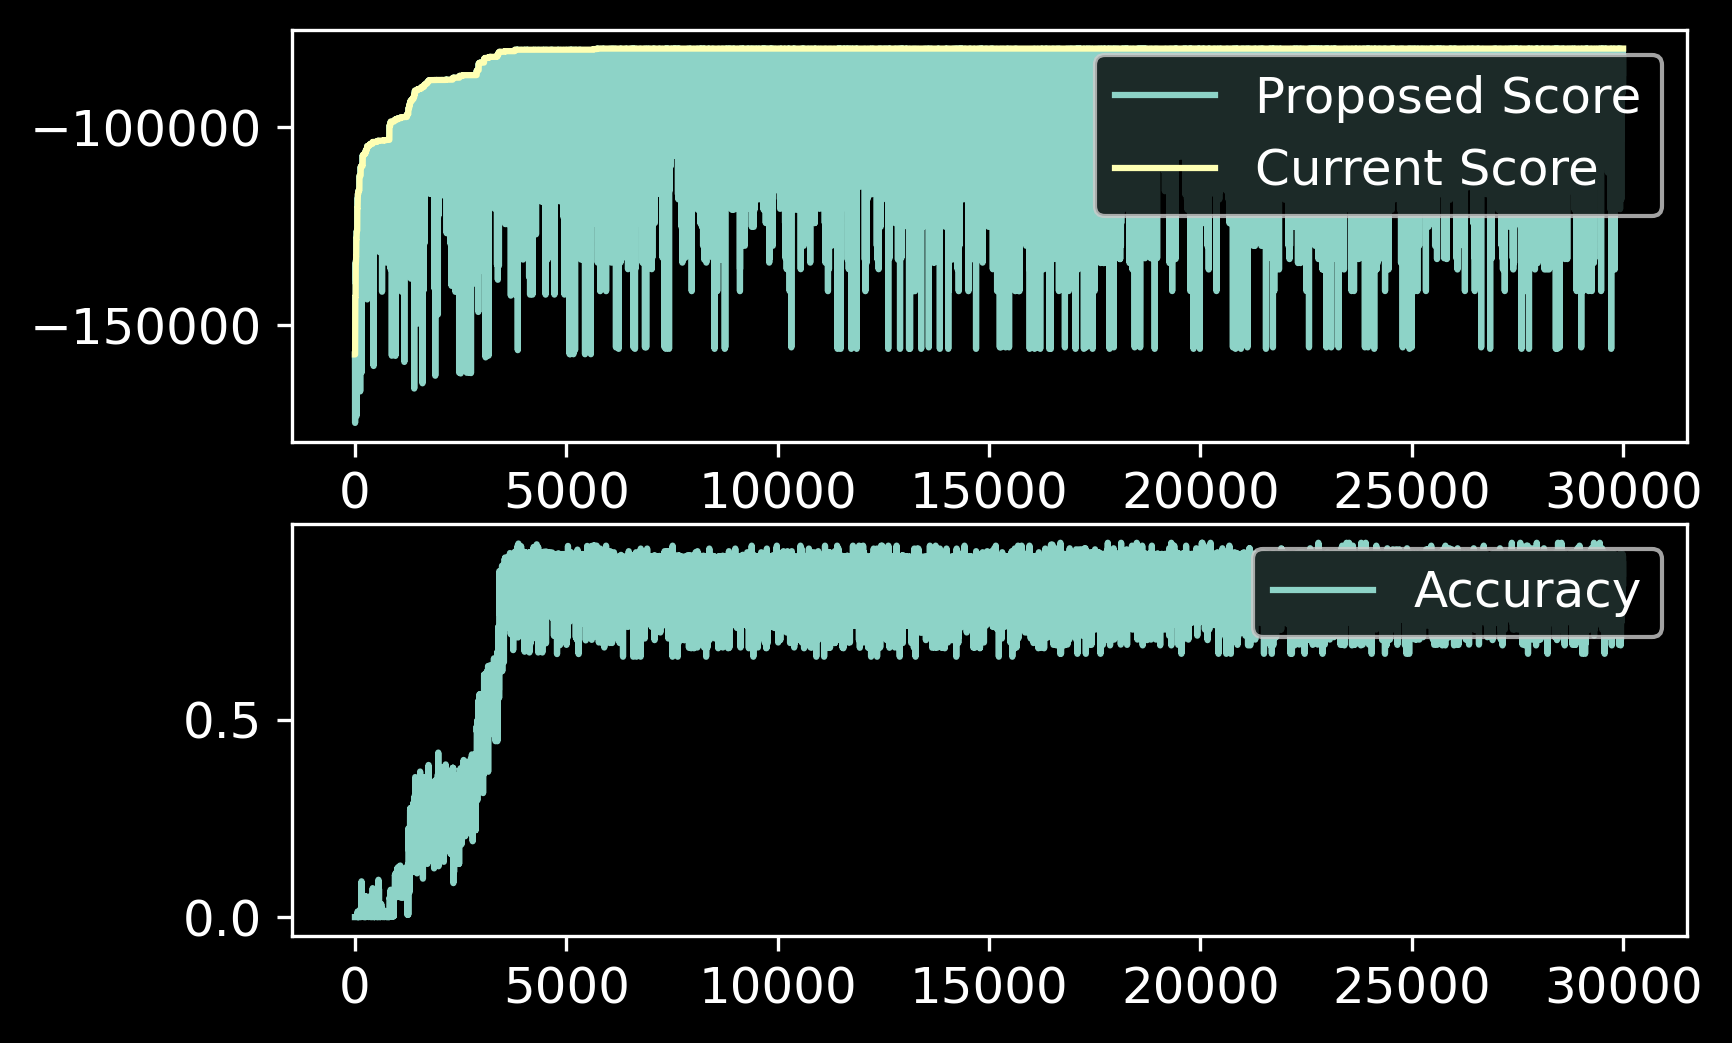

In [130]:
plot_results(anna_karenina_mcmc_2)

In [131]:
encryption_accuracy(y_pred=anna_karenina_mcmc_2.transform(encode_by_frequency(anna_karenina_sample, ngram=1)), y_true=anna_karenina_sample)

0.92

In [133]:
anna_karenina_mcmc_2.transform(encode_by_frequency(anna_karenina_sample, ngram=1))

'   анна каренина обин из садым знаденитым роданов льва толстого начинается ставшей ахориздод хразой все счастливые седьи поможи бруг на бруга кажбая несчастливая седья несчастлива посвоеду это книга о вечным фенностям о люцви о вере о седье о человеческод бостоинстве            лев толстойродан широкого бымания  часть первая   лев толстой  анна каренина     родан широкого бымания     анна каренина поразила совреденников всебневностью собержания неоцычайная своцоба раскованность повествования убивительно сочетались в этод родане с фельностью мубожественного взгляба автора на жизнь он выступал збесь как мубожник и дыслитель и назначение искусства вибел не в тод чтоцы неоспоридо разрешить вопрос а в тод чтоцы заставить люцить жизнь в цесчисленным никогба не истощидым всем ее проявлениям    в е гобы обин даститый писатель повибидоду гончаров сказал бостоевскоду это вещь неслыманная это вещь первая кто у нас из писателей дожет поравняться с этид а в европе  кто пребставит моть чтоницубь по

In [80]:
war_and_peace_en_mcmc_2 = MCMCDecoder(base_freq_dict=get_tokens_frequency(get_ngrams(war_and_peace_en, ngram=2), density=True), ngram=1)

In [81]:
war_and_peace_en_mcmc_2.fit(encoded_text=encode_by_frequency(war_and_peace_en_sample, ngram=1), 
                            ngram_for_score=2, 
                            iterations=30000, 
                            real_text=war_and_peace_en_sample)

  0%|          | 0/30000 [00:00<?, ?it/s]

Proposed Score: -209767.8729 | Current Score: -209767.8729 | Proposed Accuracy: 0.07
Proposed Score: -121930.6338 | Current Score: -110584.7286 | Proposed Accuracy: 0.58
Proposed Score: -111689.4830 | Current Score: -108046.0633 | Proposed Accuracy: 0.79
Proposed Score: -104158.5617 | Current Score: -102680.3649 | Proposed Accuracy: 0.96
Proposed Score: -104526.7356 | Current Score: -102679.8370 | Proposed Accuracy: 0.91
Proposed Score: -123951.2514 | Current Score: -102679.8370 | Proposed Accuracy: 0.95
Proposed Score: -104060.6294 | Current Score: -102679.8370 | Proposed Accuracy: 0.97
Proposed Score: -134162.7771 | Current Score: -102679.8370 | Proposed Accuracy: 0.87
Proposed Score: -104290.9359 | Current Score: -102680.3649 | Proposed Accuracy: 0.98
Proposed Score: -102910.5389 | Current Score: -102679.8370 | Proposed Accuracy: 0.97
Proposed Score: -105164.0905 | Current Score: -102680.3649 | Proposed Accuracy: 0.93
Proposed Score: -106841.5309 | Current Score: -102679.8370 | Prop

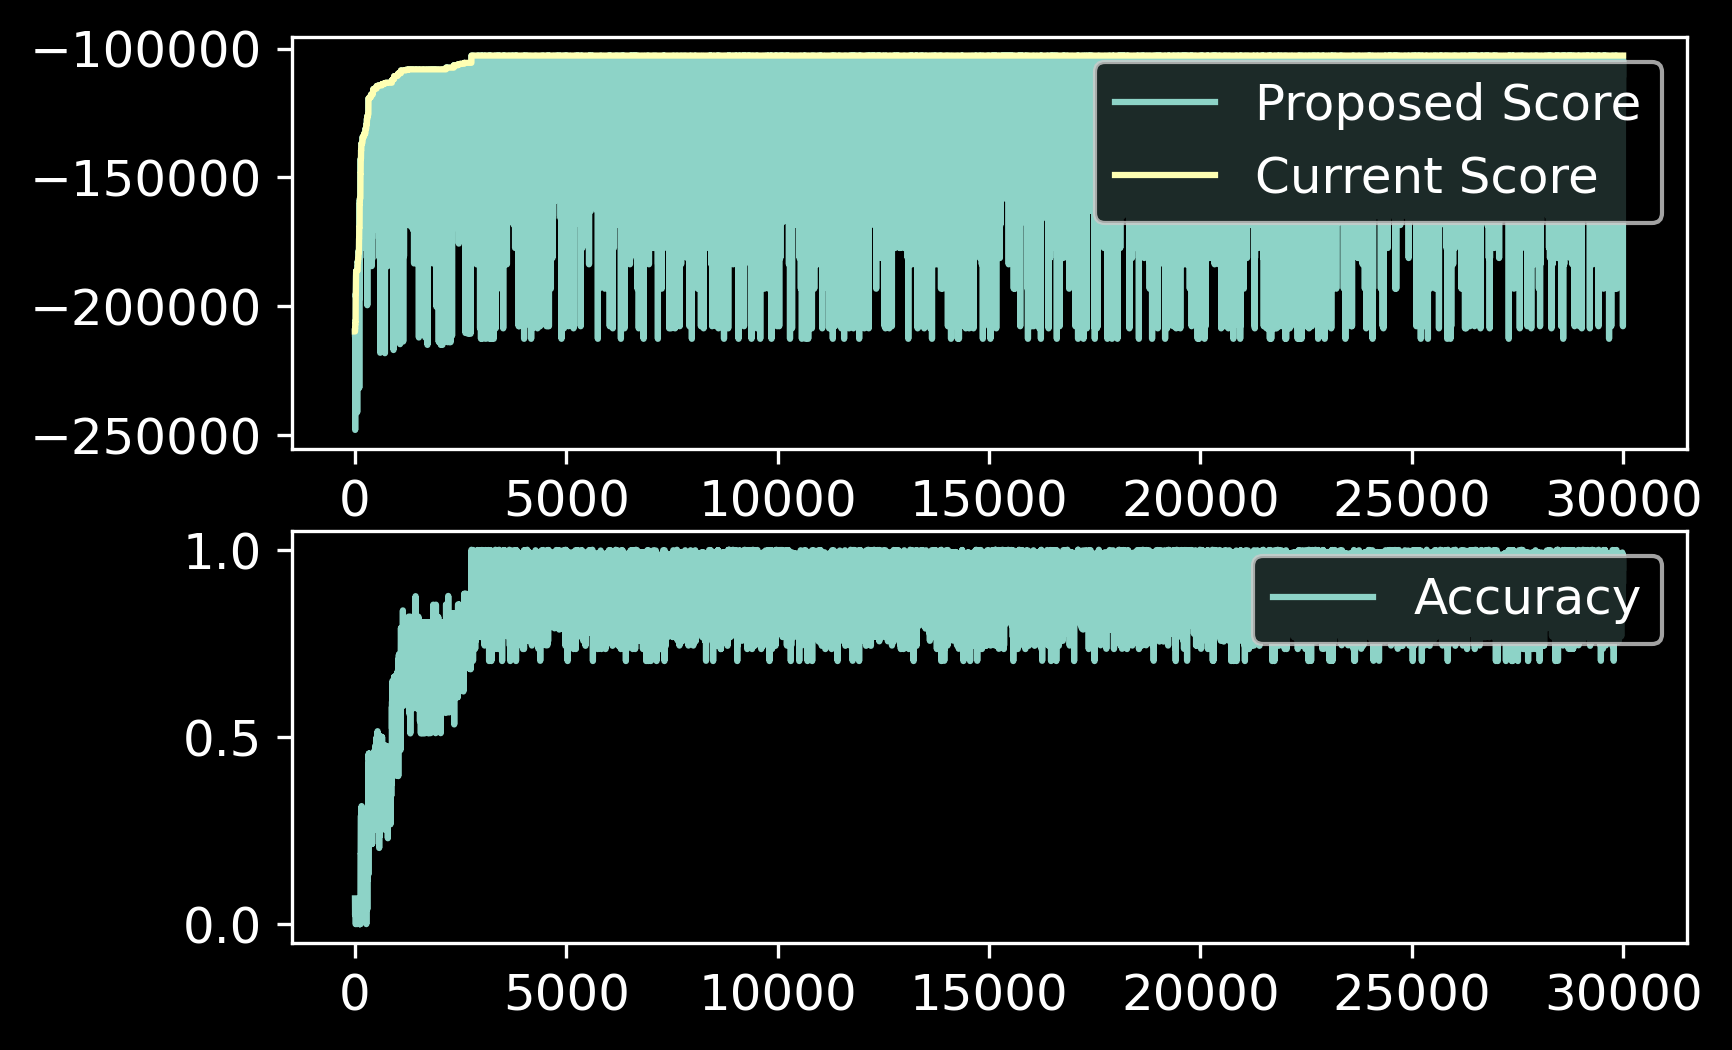

In [82]:
plot_results(war_and_peace_en_mcmc_2)

In [83]:
war_and_peace_en_mcmc_2.transform(encode_by_frequency(war_and_peace_en_sample, ngram=1))

'd footman that morning ran as follows  if you have nothing better to do count or prince and if the prospect of spending an evening with a poor invalid is not too terrible i shall be very charmed to see you tonight between  and annette scherer  heavens what a virulent attack replied the prince not in the least disconcerted by this reception he had qust entered wearing an embroidered court uniform knee breeches and shoes and had stars on his breast and a serene expression on his flat face he spoke in that refined french in which our grandfathers not only spoke but thought and with the gentle patronizing intonation natural to a man of importance who had grown old in society and at court he went up to anna pavlovna kissed her hand presenting to her his bald scented and shining head and complacently seated himself on the sofa  first of all dear friend tell me how you are set your friends mind at rest said he without altering his tone beneath the politeness and affected sympathy of which in

In [84]:
war_and_peace_ru_mcmc_2 = MCMCDecoder(base_freq_dict=get_tokens_frequency(get_ngrams(war_and_peace_ru, ngram=2), density=True), ngram=1)

In [85]:
war_and_peace_ru_mcmc_2.fit(encoded_text=encode_by_frequency(war_and_peace_ru_sample, ngram=1), 
                            ngram_for_score=2, 
                            iterations=30000, 
                            real_text=war_and_peace_ru_sample)

  0%|          | 0/30000 [00:00<?, ?it/s]

Proposed Score: -164843.4024 | Current Score: -164843.4024 | Proposed Accuracy: 0.00
Proposed Score: -103210.2755 | Current Score: -87599.3218 | Proposed Accuracy: 0.67
Proposed Score: -98693.5244 | Current Score: -84780.5703 | Proposed Accuracy: 0.84
Proposed Score: -85267.4892 | Current Score: -83403.6731 | Proposed Accuracy: 0.93
Proposed Score: -147740.2285 | Current Score: -83230.4020 | Proposed Accuracy: 0.81
Proposed Score: -84739.4728 | Current Score: -83230.4020 | Proposed Accuracy: 0.91
Proposed Score: -85250.3157 | Current Score: -83230.4020 | Proposed Accuracy: 0.97
Proposed Score: -84207.8528 | Current Score: -83230.4020 | Proposed Accuracy: 0.98
Proposed Score: -87397.1289 | Current Score: -83230.4020 | Proposed Accuracy: 0.98
Proposed Score: -84705.4922 | Current Score: -83230.4020 | Proposed Accuracy: 0.94
Proposed Score: -83981.3832 | Current Score: -83230.4020 | Proposed Accuracy: 0.96
Proposed Score: -89576.5652 | Current Score: -83230.4020 | Proposed Accuracy: 0.96


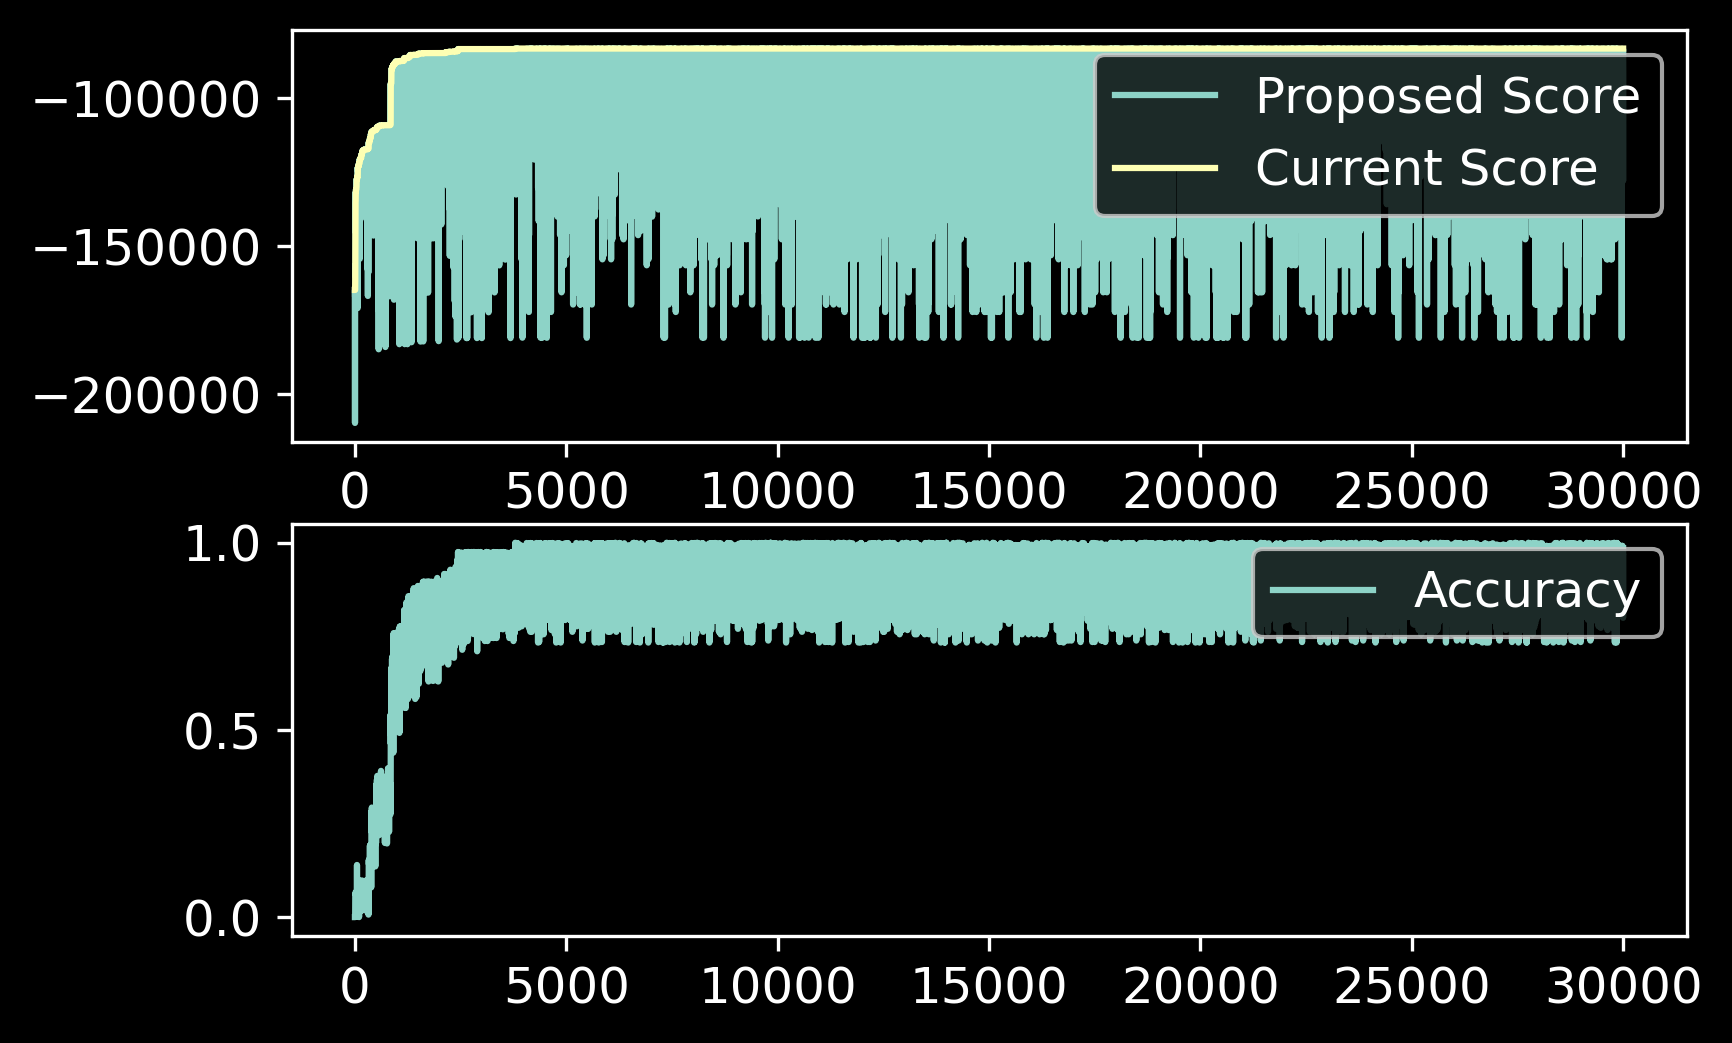

In [86]:
plot_results(war_and_peace_ru_mcmc_2)

In [87]:
war_and_peace_ru_mcmc_2.transform(encode_by_frequency(war_and_peace_ru_sample, ngram=1))

'ом в то время как анна павловна назвала императрицу лицо ее вдруг представило глубокое и искреннее выражение преданности и уважения соединенное с грустью что с ней бывало каждый раз когда она в разговоре упоминала о своей высокой покровительнице она сказала что ее величество изволила оказать барону функе   много уважения и опять взгляд ее подернулся грустью  князь равнодушно замолк анна павловна с свойственною ей придворною и женскою ловкостью и быстротою такта захотела и щелконуть князя за то что он дерзнул так отозваться о лице рекомендованном императрице и в то же время утешить его        кстати о вашей семье  сказала она  знаете ли что ваша дочь с тех пор как выезжает               составляет восторг всего общества ее находят прекрасною как день  князь наклонился в знак уважения и признательности   я часто думаю  продолжала анна павловна после минутного молчания подвигаясь к князю и ласково улыбаясь ему как будто выказывая этим что политические и светские разговоры кончены и тепер

### 4. Расшифруйте сообщение:

In [134]:
encrypted_by_sergey_nikolenko_1 = "←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"
encrypted_by_sergey_nikolenko_2 = "დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ"

In [144]:
abrakadabra_mcmc_2 = MCMCDecoder(base_freq_dict=get_tokens_frequency(get_ngrams(war_and_peace_ru, ngram=2), density=True), ngram=1, encoded_sample=encrypted_by_sergey_nikolenko_1)

In [161]:
abrakadabra_mcmc_2.fit(encoded_text=encrypted_by_sergey_nikolenko_1, 
                       ngram_for_score=2,
                       verbose=10000,
                       iterations=1000000)

  0%|          | 0/1000000 [00:00<?, ?it/s]

iter:          0 | Proposed Score: -3533.2513 | Current Score: -3533.2513
если вы вимите норзальный или ёодти норзальный текст у этого сообщения который легко ёродитать скорее всего вы все смелали ёравильно и ёолудите заксизальный балл ча ёослемнее детвертое чамание курса хотя конедно я нидего не обещаж 

iter:      10000 | Proposed Score: -3192.9128 | Current Score: -3175.1211
если вы вимите норзальный или подти норзальный текст у этого сообщению который легко продитать скорее всего вы все смелали правильно и полудите заксизальный балл ча послемнее детвертое чамание курса шотю конедно ю нидего не обещаж 

iter:      20000 | Proposed Score: -3537.8466 | Current Score: -3173.4908
есци вы вимите норзацьный ици подти норзацьный текст у этого сообщения который цегко продитать скорее всего вы все смецаци правицьно и поцудите заксизацьный бацц ча посцемнее детвертое чамание курса хотя конедно я нидего не обещаю 

iter:      30000 | Proposed Score: -3981.3243 | Current Score: -3181.7666
ес ил

iter:     270000 | Proposed Score: -3562.7361 | Current Score: -3183.0659
еслб вы вбмбте нордальный блб поштб нордальный текст у этого сооищенбя который легко прошбтать скорее всего вы все смелалб правбльно б полушбте даксбдальный иалл за послемнее шетвертое заманбе курса чотя конешно я нбшего не оиещаж 

iter:     280000 | Proposed Score: -3177.0614 | Current Score: -3173.8223
если вы вижите нордальный или помти нордальный текст у этого сообщения который легко промитать скорее всего вы все сжелали правильно и полумите даксидальный балл за послежнее метвертое зажание курса хотя конемно я нимего не обещач 

iter:     290000 | Proposed Score: -3311.2655 | Current Score: -3179.0554
есви лы лижите нордавьный иви помти нордавьный текст у этого сообшения который вегко промитать скорее лсего лы лсе сжевави праливьно и повумите даксидавьный бавв за посвежнее метлертое зажание курса хотя конемно я нимего не обешаф 

iter:     300000 | Proposed Score: -3594.7098 | Current Score: -3176.4355
если 

iter:     540000 | Proposed Score: -3240.3566 | Current Score: -3175.6956
ечли вы вимите нордальный или пости нордальный текчт у этого чообщения который легко проситать чкорее вчего вы вче чмелали правильно и полусите дакчидальный балл за почлемнее сетвертое замание курча хотя конесно я нисего не обещаж 

iter:     550000 | Proposed Score: -3875.2459 | Current Score: -3175.5901
есёи вы вижите нордаёьный иёи помти нордаёьный текст у чтого сообщения который ёегко промитать скорее всего вы все сжеёаёи правиёьно и поёумите даксидаёьный баёё за посёежнее метвертое зажание курса хотя конемно я нимего не обещаш 

iter:     560000 | Proposed Score: -3263.7125 | Current Score: -3176.3064
если вы вичите нордульный или помти нордульный текст а этого сообшения который легко промитуть скорее всего вы все счелули прувильно и поламите дуксидульный булл зу послечнее метвертое зучуние карсу хотя конемно я нимего не обешуф 

iter:     570000 | Proposed Score: -3418.2875 | Current Score: -3173.4908
если 

iter:     810000 | Proposed Score: -3714.2321 | Current Score: -3173.8223
если вы вичите нордйльныа или помти нордйльныа текст у этого сообщения которыа легко промитйть скорее всего вы все счелйли прйвильно и полумите дйксидйльныа бйлл зй послечнее метвертое зйчйние курсй хотя конемно я нимего не обещйж 

iter:     820000 | Proposed Score: -3484.1641 | Current Score: -3174.7669
тсли вы вимиет норзальный или подеи норзальный етксе у эеого сообжтния коеорый лтгко продиеаеь скортт встго вы вст смтлали правильно и полудиет заксизальный балл ча послтмнтт дтевтреот чаманит курса хоея контдно я нидтго нт обтжаф 

iter:     830000 | Proposed Score: -4117.7147 | Current Score: -3173.4908
есл ивыив м теинорзальныйи л иподт инорзальныйитекстиуиэтогоисообщен яикоторыйилегкоипрод татьискорееивсегоивыивсеисмелал иправ льнои иполуд теизакс зальныйибалличаипослемнееидетвертоеичаман еикурсаихотяиконедноияин дегоинеиобещаю 

iter:     840000 | Proposed Score: -3272.2761 | Current Score: -3173.0609
если 

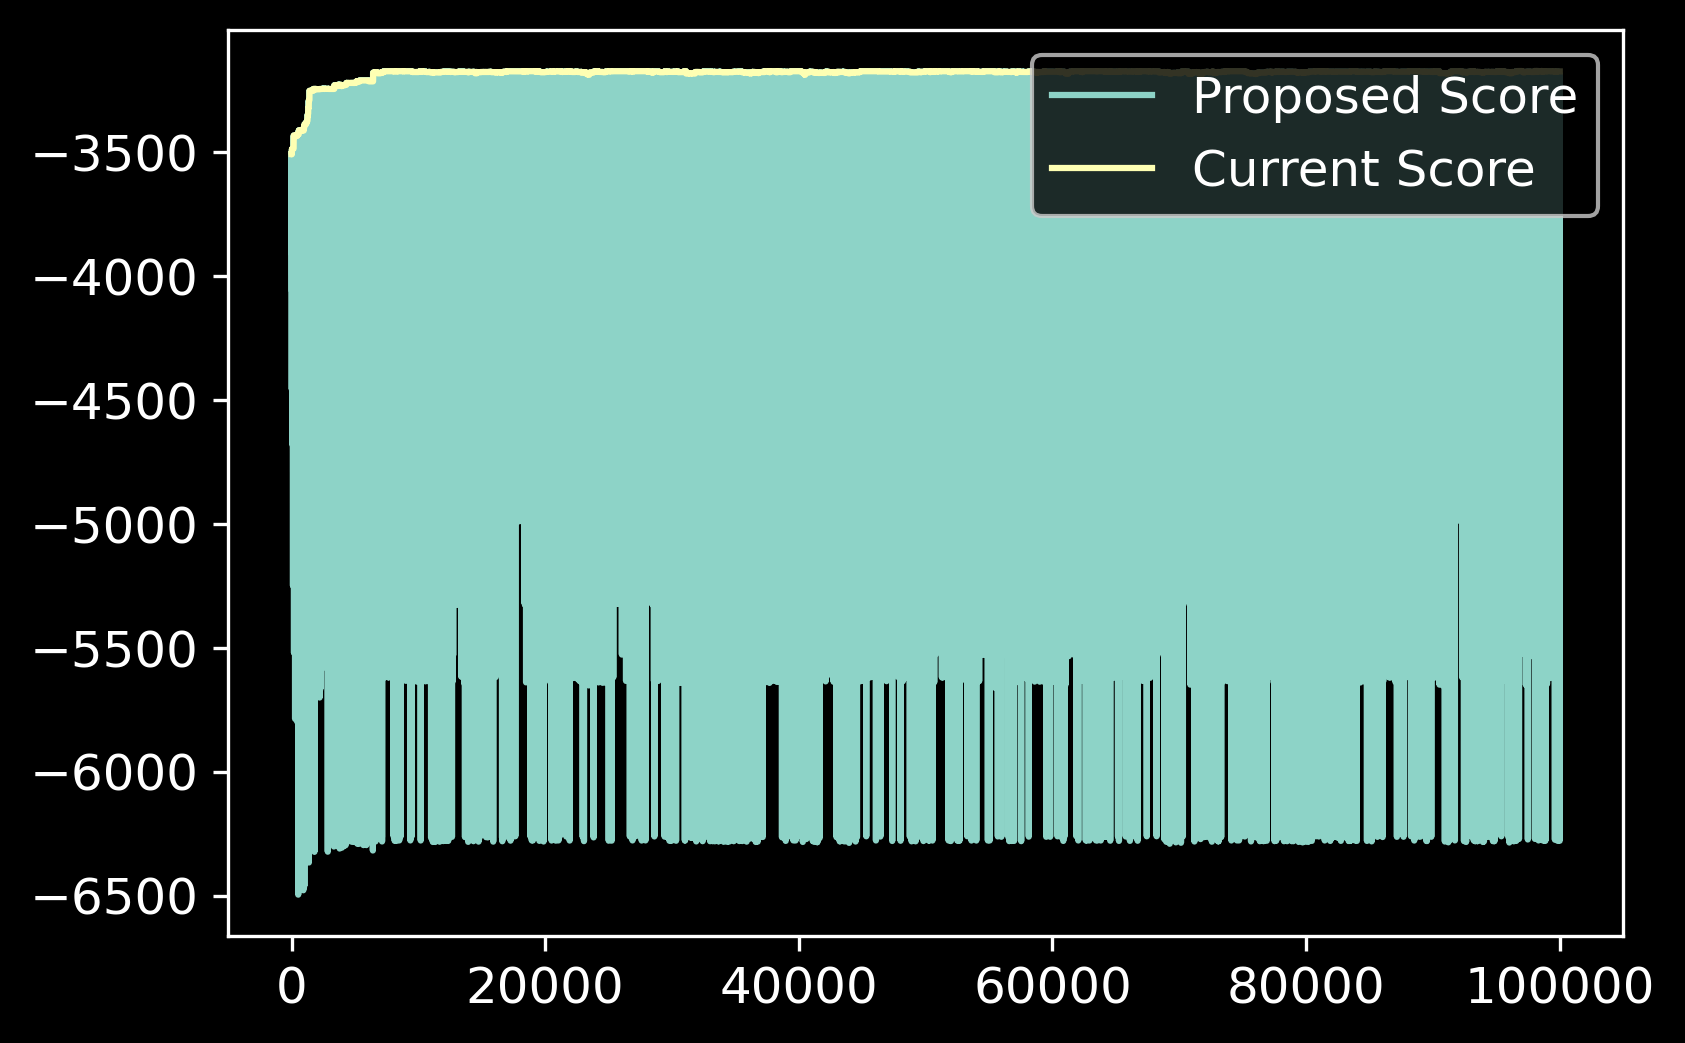

In [149]:
plot_results(abrakadabra_mcmc_2)

In [162]:
abrakadabra_mcmc_2.transform(encrypted_by_sergey_nikolenko_1)

'если вы вимите норзальный или подти норзальный текст у этого сообшения который легко продитать скорее всего вы все смелали правильно и полудите заксизальный балл ча послемнее детвертое чамание курса хотя конедно я нидего не обешаю'

In [153]:
decrypted_sergey_nikolenko = "если вы видите нормальный или почти нормальынй текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя я конечно ничего не обещаю"

In [156]:
from pprint import pprint

In [157]:
pprint(decrypted_sergey_nikolenko)

('если вы видите нормальный или почти нормальынй текст у этого сообщения '
 'который легко прочитать скорее всего вы все сделали правильно и получите '
 'максимальный балл за последнее четвертое задание курса хотя я конечно ничего '
 'не обещаю')
